## Лабораторная работа 3. Фильтрация изображений
### Водяный Михаил, РИМ-181228

In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
%matplotlib inline

### Операция свертки. Линейные фильтры

#### Свертка

In [2]:
image = np.array([[0, -8, -3, -2], 
                  [1, 9, -8, 0], 
                  [9, -4, 5, -9], 
                  [6, -4, 6, 3]])

kernel = np.array([[4, -5, 4], 
                   [-6, -8, -2], 
                   [1, 5, 5]])

print(convolve2d(kernel, image, mode='valid'))

[[  7 -88]
 [ 94  -7]]


#### Box-фильтр

In [3]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
answer_box = imread("https://stepik.org/media/attachments/lesson/61037/box-tiger.png")

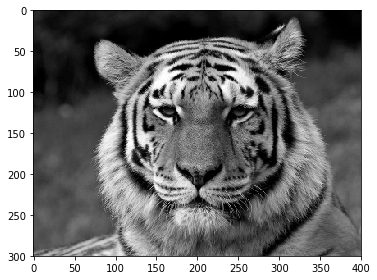

In [4]:
imshow(img)

In [5]:
def box_filter(img, size):
    res = np.zeros((img.shape[0]-size+1, img.shape[1]-size+1), dtype=np.int)

    for i in range (img.shape[0]-size+1):
        for j in range (img.shape[1]-size+1):

            a = 0
            for k in range (size):
                for n in range (size):
                    a = a + img[i + k, j + n]

            res [i, j] = int (a / size**2)
    return res

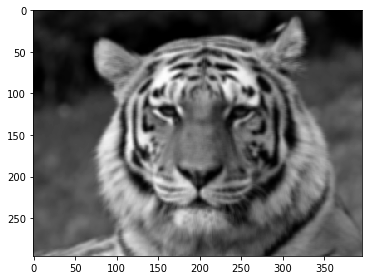

In [6]:
imshow(answer_box)

In [7]:
img = box_filter(img, 5)
np.array_equal(answer_box, img)

True

#### Подсчет функции Гаусса

In [8]:
def gauss(sigma, x, y):
    return 1/((2*np.pi)*sigma**2)*np.e**((-x**2 - y**2)/(2*sigma**2))
gauss(1, 1, 1)

0.05854983152431917

#### Ядро гауссовского фильтра

In [9]:
def gauss_kernel(sigma):
    k = round(3*sigma)
    kernel = [[gauss(sigma, x, y) for x in range(-k, k+1)] for y in range(-k, k+1)]
    kernel = np.array(kernel)
    norm_kernel = kernel / np.sum(kernel, axis=(0,1))
    return norm_kernel

In [10]:
gauss_kernel(0.33)

array([[9.87532107e-05, 9.73995858e-03, 9.87532107e-05],
       [9.73995858e-03, 9.60645153e-01, 9.73995858e-03],
       [9.87532107e-05, 9.73995858e-03, 9.87532107e-05]])

#### Гауссовская фильтрация

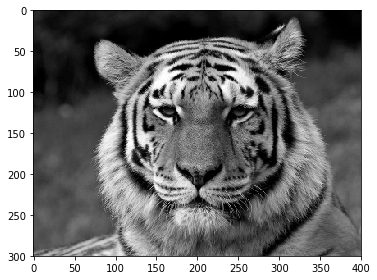

In [11]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
imshow(img)

In [12]:
sigma = 0.66
kernel = gauss_kernel(sigma)
img_gauss_filter = convolve2d(img, kernel, mode='valid').astype('uint8')

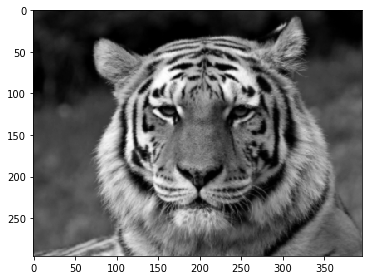

In [13]:
imshow(img_gauss_filter)

In [14]:
answer_gauss_filter = imread("https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png")

np.array_equal(img_gauss_filter, answer_gauss_filter)

True

#### Повышение резкости изображения

In [15]:
def sharp(img):    
    res = np.array([[[0] * img.shape[1]] * img.shape[0]], dtype='float')[0]

    kernel = np.array([[-1, -2, -1],
                       [-2, 22, -2],
                       [-1, -2, -1]]) / 10

    for i in range(3, img.shape[0] + 1):
        for j in range(3, img.shape[1] + 1):
            res[i - 3, j - 3] = (img[i-3: i, j-3: j] * kernel).sum()

    res = np.clip(res[: - 2, : - 2], 0, 255).astype('uint8')
    return res

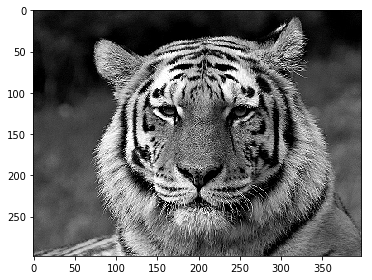

In [16]:
img_sharp = sharp(img)
imshow(img_sharp)

In [17]:
answer_sharp = imread('https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png')
np.array_equal(img_sharp, answer_sharp)

True

#### Медианный фильтр

In [18]:
def median(img, size = 7):
    res = img.copy()
    rows,cols = img.shape
    half = size//2

    for i in range(half,rows-half):
        for j in range(half,cols-half):
            a = img[i-half:i+half+1,j-half:j+half+1]
            m = np.median(a)
            res[i][j] = m

    res = res[half:rows-half,half:cols-half]
    return res

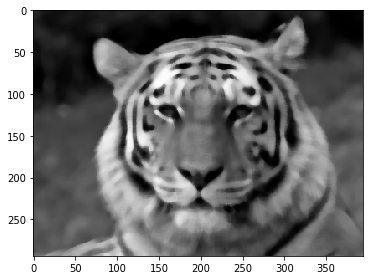

In [19]:
img_median = median(img)
imshow(img_median)

In [20]:
answer_median = imread('https://stepik.org/media/attachments/lesson/61041/median-tiger.png')
np.array_equal(answer_median, img_median)

True